## SVM

In [84]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_chisquare
from scipy.stats import chisquare
import pickle
from bs4 import BeautifulSoup
from collections import defaultdict
import requests
from statsmodels.stats.multitest import fdrcorrection_twostage
%matplotlib inline

In [85]:
# Read Training Data
drugs_com = pd.read_csv('drugsComTrain_raw.tsv',sep='\t',index_col=0)

In [86]:
#Create Date Field
drugs_com['date'] = pd.to_datetime(drugs_com['date'])

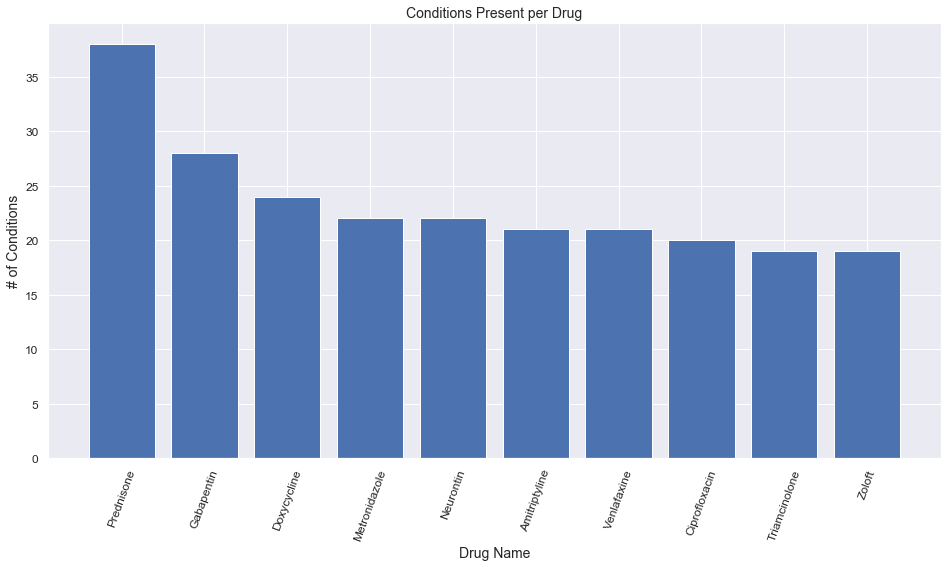

In [87]:
# Number of conditions present per drug
df = drugs_com.groupby(['drugName'])['condition'].nunique().sort_values(ascending = False).reset_index().head(10)
plt.rcParams['figure.figsize'] = [16, 8]
plt.bar(x=df['drugName'],height = df['condition'])

plt.title('Conditions Present per Drug', fontsize = 14)
plt.xlabel('Drug Name', fontsize = 14)
plt.ylabel('# of Conditions', fontsize = 14)
plt.xticks(rotation=70)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

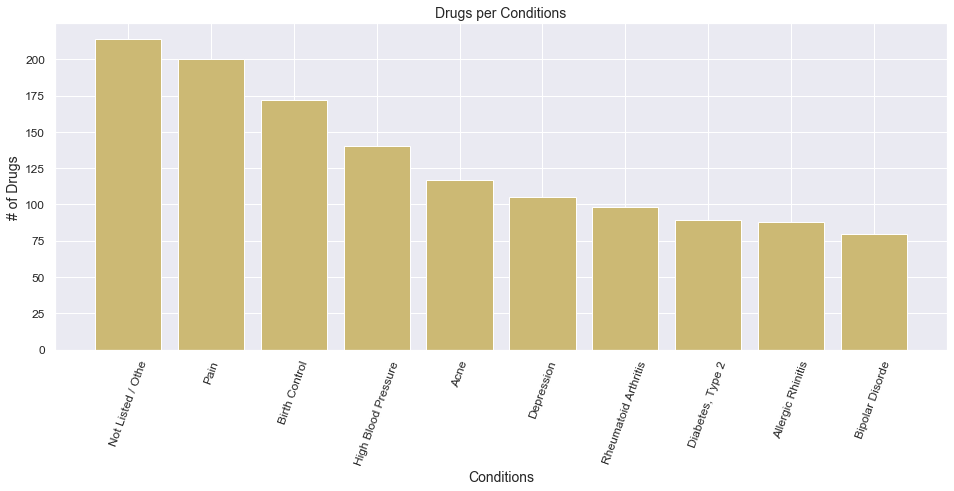

In [88]:
# Drugs available for top conditions
df = drugs_com.groupby(['condition'])['drugName'].nunique().sort_values(ascending = False).reset_index().head(10)
plt.rcParams['figure.figsize'] = [16, 6]
plt.bar(x=df['condition'],height = df['drugName'],color='y')
plt.xticks(rotation=90)
plt.title('Drugs per Conditions', fontsize = 14)
plt.xlabel('Conditions', fontsize = 14)
plt.ylabel('# of Drugs', fontsize = 14)
plt.xticks(rotation=70)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

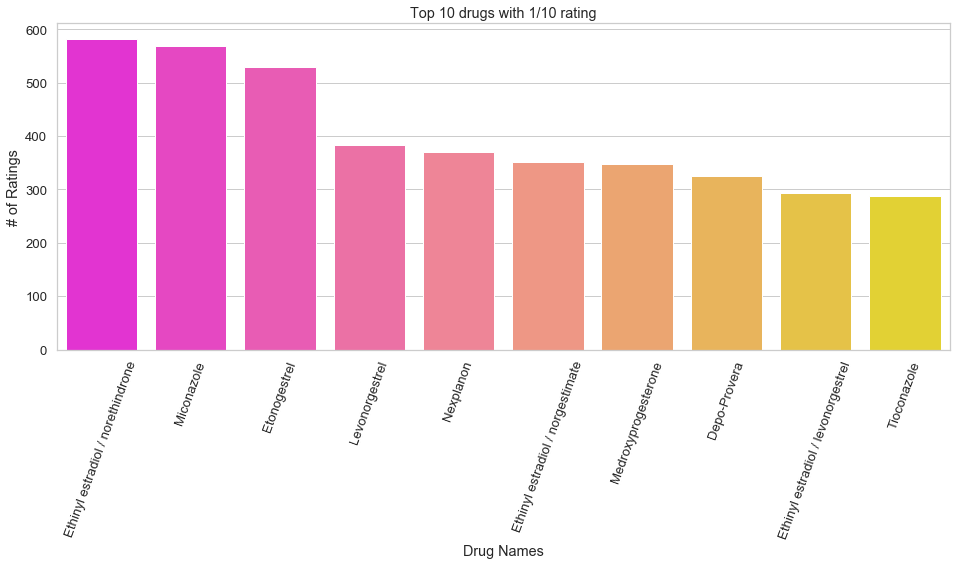

In [89]:
# Top drugs with ratig 1/10
sns.set(font_scale = 1.2, style = 'whitegrid')
plt.rcParams['figure.figsize'] = [16, 6]

rating = dict(drugs_com.loc[drugs_com.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:10], y = drug_rating[0:10], palette = 'spring')

sns_rating.set(title = 'Top 10 drugs with 1/10 rating', ylabel = '# of Ratings', xlabel = "Drug Names")

plt.setp(sns_rating.get_xticklabels(), rotation=70);

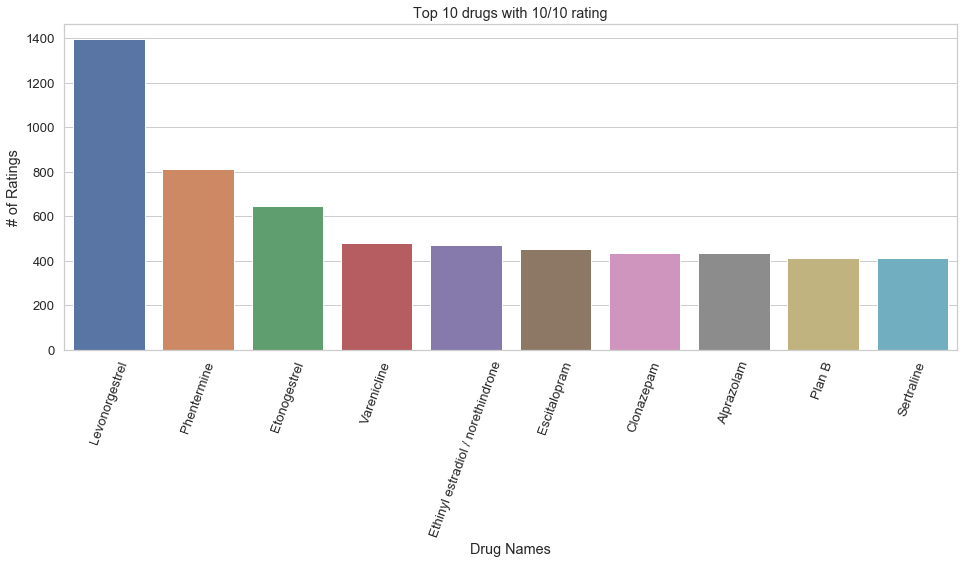

In [90]:
# Top 20 drugs with the rating 10/10

sns.set(font_scale = 1.2, style = 'whitegrid')
plt.rcParams['figure.figsize'] = [16, 6]

rating = dict(drugs_com.loc[drugs_com.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:10], y = drug_rating[0:10])

sns_rating.set(title = 'Top 10 drugs with 10/10 rating', ylabel = '# of Ratings', xlabel = "Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=70);

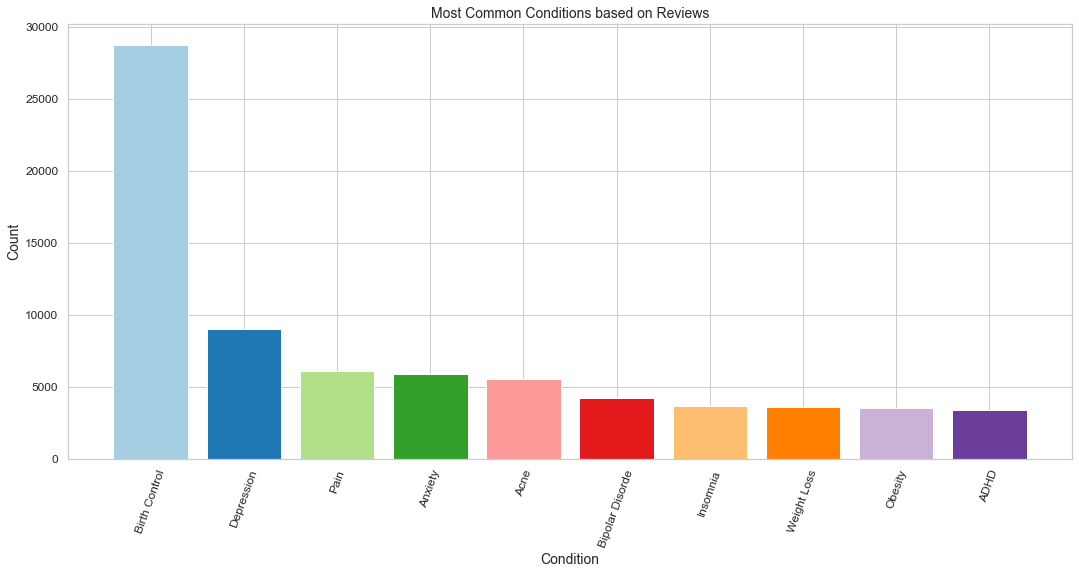

In [91]:
# Top Conditions based on Reviews
df = drugs_com['condition'].value_counts().head(10).reset_index()
df.columns = ['condition','count']
plt.rcParams['figure.figsize'] = [18, 8]
plt.bar(x=df['condition'],height = df['count'], color=plt.cm.Paired(np.arange(len(df))))
plt.xticks(rotation=70)
plt.title('Most Common Conditions based on Reviews', fontsize = 14)
plt.xlabel('Condition', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

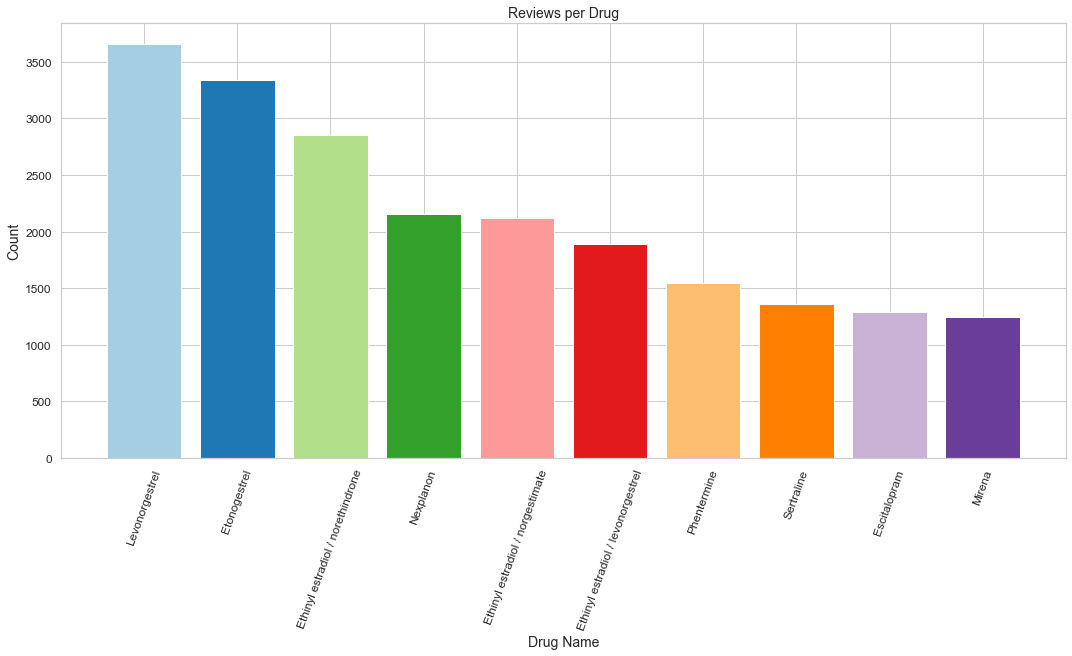

In [92]:
# Top Conditions based on Reviews
df = drugs_com['drugName'].value_counts().head(10).reset_index()
df.columns = ['drugName','count']
plt.rcParams['figure.figsize'] = [18, 8]
plt.bar(x=df['drugName'],height = df['count'], color=plt.cm.Paired(np.arange(len(df))))
plt.xticks(rotation=70)
plt.title('Reviews per Drug', fontsize = 14)
plt.xlabel('Drug Name', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [93]:
# Extract Year and Month
drugs_com['year'] = drugs_com['date'].dt.year
drugs_com['month'] = drugs_com['date'].dt.month

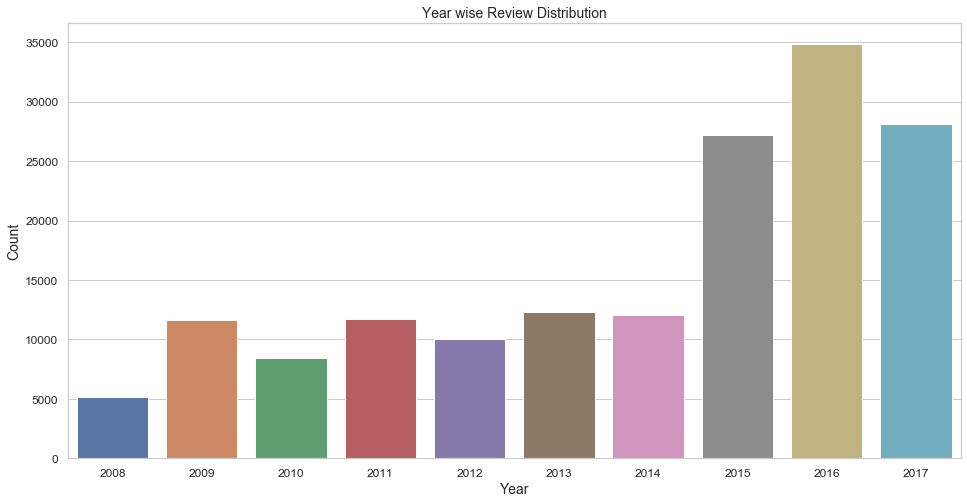

In [94]:
# Distribution of reviews in each year
plt.rcParams['figure.figsize'] = (16, 8)
sns.countplot(drugs_com['year'])
plt.title('Year wise Review Distribution', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

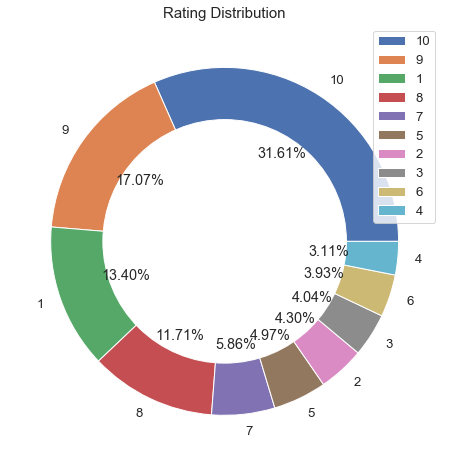

In [95]:
# Frequency of each rating
df = drugs_com['rating'].value_counts().reset_index()

# Converting float rating values to int
df.columns = ['rating','count']
df = df.astype({'rating':'int'})

# Plotting user rating distribution
size = df['count']
#colors = ['salmon','lavender','lightgreen','pink','wheat','azure','sienna','orange','turquoise','red']
labels = df['rating']

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size,labels = labels, autopct = '%.2f%%')
plt.title('Rating Distribution', fontsize = 15)
plt.legend()
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.show()

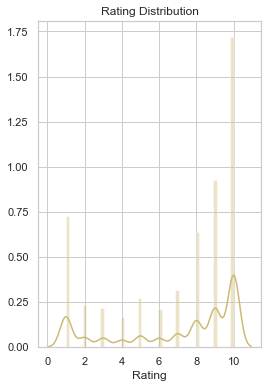

In [96]:
# Plotting a univariate distribution of observations for Amount Columns
plt.figure(figsize=(4,6))
sns.set(style="whitegrid")

plt.title("Rating Distribution")
sns.distplot(drugs_com['rating'], color='y')
plt.xlabel('Rating', fontsize = 12)

plt.show()

In [97]:
drugs_com["Word Count"] = drugs_com['review'].str.split().str.len()

In [98]:
drugs_com['Word Count'].describe()

count    161297.000000
mean         84.699802
std          45.044833
min           1.000000
25%          48.000000
50%          84.000000
75%         126.000000
max        1894.000000
Name: Word Count, dtype: float64

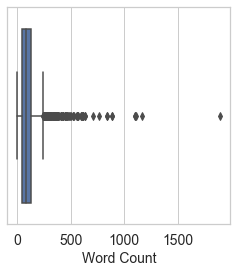

In [99]:
plt.figure(figsize=(4,4))
sns.boxplot(drugs_com['Word Count'])
plt.xlabel('Word Count', fontsize = 14)
plt.xticks(fontsize=14)
plt.show()

C:\Users\ankit\Anaconda3\lib\site-packages\seaborn\utils.py:127: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  rgb = mplcol.colorConverter.to_rgb(color)


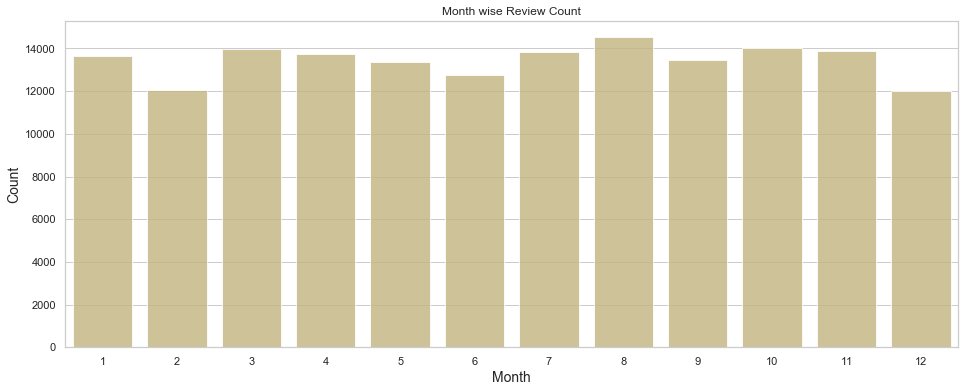

In [100]:
# Month Wise Review Count

cnt_srs = drugs_com['date'].dt.month.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(16,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='Y')
plt.xticks(rotation='vertical')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Month wise Review Count")
plt.xticks(rotation=360)
plt.show()

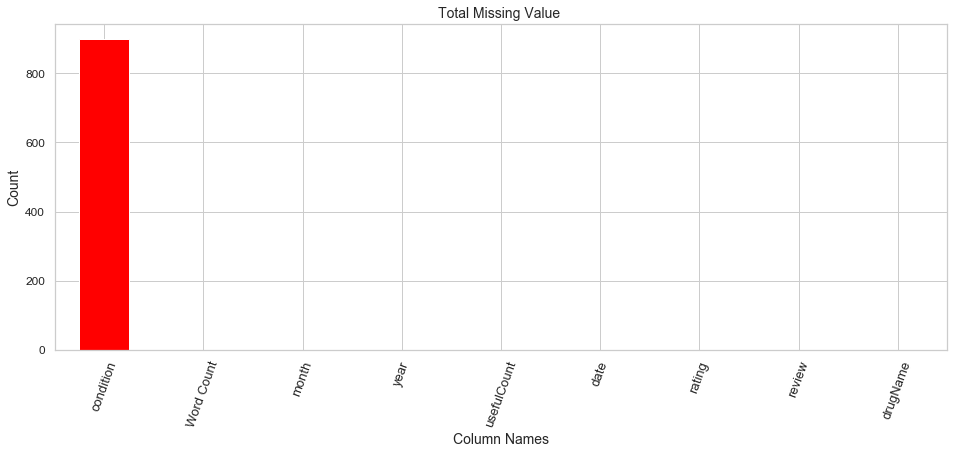

In [101]:
# Missing Values
percent = (drugs_com.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (16,6), fontsize = 14, color='red')
plt.xlabel("Column Names", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.title("Total Missing Value ", fontsize = 14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xticks(rotation=70)
plt.show()

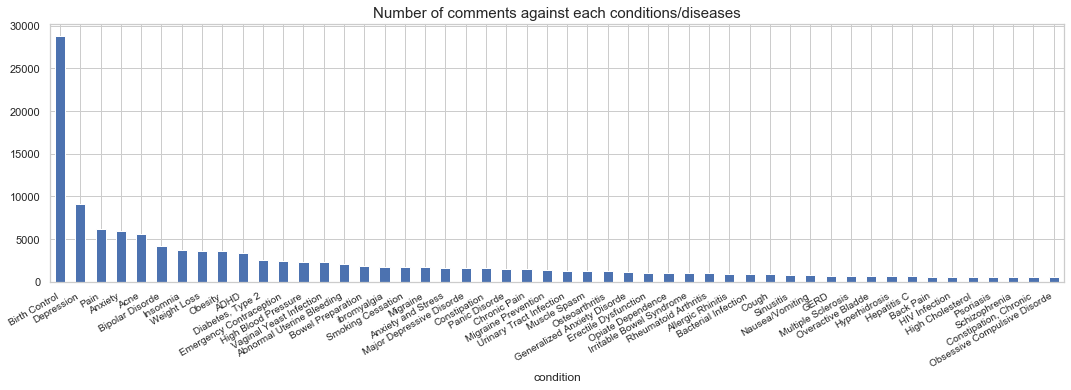

In [102]:
# Number of comments against each condition
df_con_mon = pd.DataFrame(drugs_com.groupby(['condition','month']).size()).reset_index()

df_con_mon_pivot = df_con_mon.pivot_table(index='condition',columns='month',values=0)

fig = plt.figure(figsize=(15,5))
df_con_mon_pivot.sum(1).sort_values(ascending=False).iloc[:50].plot(kind='bar')
plt.title("Number of comments against each conditions/diseases",fontsize=15)
plt.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right')
plt.xticks(fontsize=10)
plt.show()

In [103]:
# Avg comments for each condition in each month
df_con_mon_pivot_sorted = df_con_mon_pivot.loc[df_con_mon_pivot.sum(1).sort_values(ascending=False).index]

df_con_mon_pivot_sorted.sum() / len(df_con_mon_pivot_sorted)

month
1     15.356335
2     13.541855
3     15.686652
4     15.442308
5     15.020362
6     14.348416
7     15.580317
8     16.380090
9     15.158371
10    15.804299
11    15.606335
12    13.520362
dtype: float64

In [104]:
def remove_sym(df):
    df['review'] = df['review'].str.replace("&#039;",'\'')
    df['review'].head()
    df['rating_lab'] = ''
    df.loc[df['rating'] >= 7,'rating_lab'] = 'high'
    df.loc[df['rating'] <= 4,'rating_lab'] = 'low'
    df.loc[(df['rating'] > 4) & (df['rating'] < 7),'rating_lab'] = 'medium'
    return df

drugs_com = remove_sym(drugs_com)

In [105]:
# Read Test Data
df_test = pd.read_csv("drugsComTest_raw.tsv",sep='\t', index_col=0)
df_test = remove_sym(df_test)

In [106]:
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.stem.snowball import SnowballStemmer
import re
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, roc_auc_score , f1_score

## only need to remove punctuation and stemize
stemmer = SnowballStemmer('english')

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    text = "".join([ch for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

In [107]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [108]:
df_temp = drugs_com
df_temp.groupby('rating_lab').size() / df_temp.groupby('rating_lab').size().sum()

rating_lab
high      0.662542
low       0.248455
medium    0.089004
dtype: float64

In [109]:
# Tf-idf Vectorizer transform train and test
con_vec = TfidfVectorizer(stop_words='english',tokenizer=tokenize)
X_train = con_vec.fit_transform(df_temp['review'])
y_train = df_temp['rating_lab']
X_test = con_vec.transform(df_test['review'])
y_test = df_test['rating_lab']

print(X_train.shape)
print(X_test.shape)

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(161297, 65739)
(53766, 65739)


In [27]:
# Fit Polynomial Kernel
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train,y_train)
y_test_pred_poly_svm = svm_poly.predict(X_test)

In [28]:
# Accuracy of Polynomial Kernel
accuracy_score(y_test,y_test_pred_poly_svm)

0.6591526243350817

In [29]:
# Fit RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train,y_train)
y_test_pred_rbf_svm = svm_rbf.predict(X_test)

In [30]:
# Accuracy of RBF kernel
accuracy_score(y_test,y_test_pred_rbf_svm)

0.6591526243350817

In [110]:
# Fit Linear SVM Model
svm_lin = SVC(kernel='linear')
svm_lin.fit(X_train,y_train)
y_test_pred_linear_svm = svm_lin.predict(X_test)

In [111]:
# Accuracy of Linear SVM Model
accuracy_score(y_test,y_test_pred_linear_svm)

0.7891976341926125

In [112]:
# Confusion Matrix for Linear Kernel
svm_lin_conf_matrix = confusion_matrix(y_test,y_test_pred_linear_svm)
svm_lin_conf_matrix

array([[33232,  2206,     2],
       [ 4299,  9198,     0],
       [ 3319,  1508,     2]], dtype=int64)

## CNN-LSTM

In [113]:
import pandas as pd
import numpy as np
import re, string, unicodedata

!pip install inflect
import inflect
from string import punctuation
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import nltk

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

from keras.models import Model, Sequential
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop, SGD
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer


from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

%matplotlib inline

In [114]:
# Import stopwords. 
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

drug_stopwords = pd.read_csv('drugname_stopwords.csv')

MAX_SEQUENCE_LENGTH = 100
MAX_NB_WORDS = 3000
EMBEDDING_DIM = 160

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [115]:
# Load dataset.
train_df = pd.read_table('drugsComTrain_raw.tsv')
test_df = pd.read_table('drugsComTest_raw.tsv')

In [116]:
# Categorization
def rank_bin(array):
  y_rank = []
  for i in array:
    if i <= 4: 
      y_rank.append('Negative')
    elif i >= 7:
      y_rank.append('Positive')
    else:
      y_rank.append('Neutral')
  return y_rank

# Assign test & train data their classes.
train_df['classes_to_predict'] = rank_bin(train_df['rating'])
test_df['classes_to_predict'] = rank_bin(test_df['rating'])

# Make a variable to contain the class labels.
classes_to_predict = ['Positive','Negative','Neutral']
print(train_df['classes_to_predict'].value_counts())
print(test_df['classes_to_predict'].value_counts()) # Check bin sizes.

Positive    106866
Negative     40075
Neutral      14356
Name: classes_to_predict, dtype: int64
Positive    35440
Negative    13497
Neutral      4829
Name: classes_to_predict, dtype: int64


In [117]:
# Preprocessing
remove_special_char = re.compile('r[^a-z\d]',re.IGNORECASE)

# Regex to replace all numerics
replace_numerics = re.compile(r'\d+',re.IGNORECASE)

# F&#K Unicode Emojis
emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       u"\U0001f926-\U0001f937"
                       u"\u200d"
                       u"\u2640-\u2642" 
                       "]+", flags=re.UNICODE)

# Load NLTK stop words
stop_words = nltk.corpus.stopwords.words('english')
print ("NLTK stopword list length: ",len(stop_words),'words')

# Add custom drug stopwords
stop_words.extend(drug_stopwords)

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words


# Define Text-PreProcessing function
def preprocess_text(text, remove_stopwords = True, perform_stemming = True):
    #first clean text then go to lowercase and split.
    text = text.replace(r"http\S+", "")
    text = text.replace(r"http", "")
    text = text.replace(r"(\d)", "")
    text = text.replace(r"@\S+", "")
    text = text.replace(r"@", "at")
    text = remove_special_char.sub('', text)
    text = replace_numerics.sub('n', text)
    text = emoji_pattern.sub('', text)
    text = text.replace( r"(\\r)|(\\n)|(\\t)|(\\f)|(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(&#039;)|(\d\s)|(\d)|(\/)","")
    text = text.replace( r"(\-)|(\\)|(\s{2,})"," ")
    text = text.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    text = text.replace(r"(&#n;)", "")
    
    # per/wordprocessing
    textlist = text.lower().split()
    textlist = normalize(textlist)
    text = ' '.join(textlist) 

    # stemming  
    if(perform_stemming):
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = ' '.join(stemmed_words)
        
    return text

NLTK stopword list length:  179 words


In [118]:
# Clean text
raw_train_comments = train_df['review'].fillna('NA').values
raw_test_comments = test_df['review'].fillna('NA').values

# Define y for Training/Validation 
y = pd.get_dummies(train_df['classes_to_predict']).values

# Define y for Tests
y_test_predicted = pd.get_dummies(test_df['classes_to_predict']).values

# Process reviews for Training (X)
processed_train_comments = []
for comment in tqdm(raw_train_comments):
    processed_train_comments.append(preprocess_text(comment))

# Process reviews
processed_test_comments = []    
for comment in tqdm(raw_test_comments):
    processed_test_comments.append(preprocess_text(comment))

100%|██████████████████████████████████████████████████████████████████████████| 53766/53766 [00:49<00:00, 1092.90it/s]


In [119]:
#reload 
processed_train_comments = [line.strip() for line in open("processed_train_commentss.csv", 'r')]
processed_test_comments = [line.strip() for line in open("processed_test_commentss.csv", 'r')]

y = np.loadtxt(open("y_trainn.csv", "r"), delimiter=",").astype("int")
y_test_predicted = np.loadtxt(open("y_testt.csv", "rb"), delimiter=",").astype("int")

print (len(processed_train_comments))
print (len(y))
print (len(processed_test_comments))
print (len(y_test_predicted))

161297
161297
53766
53766


In [120]:
train_df_ii = pd.DataFrame(y)
train_df_ii[3] = processed_train_comments

43.52259496456847
969


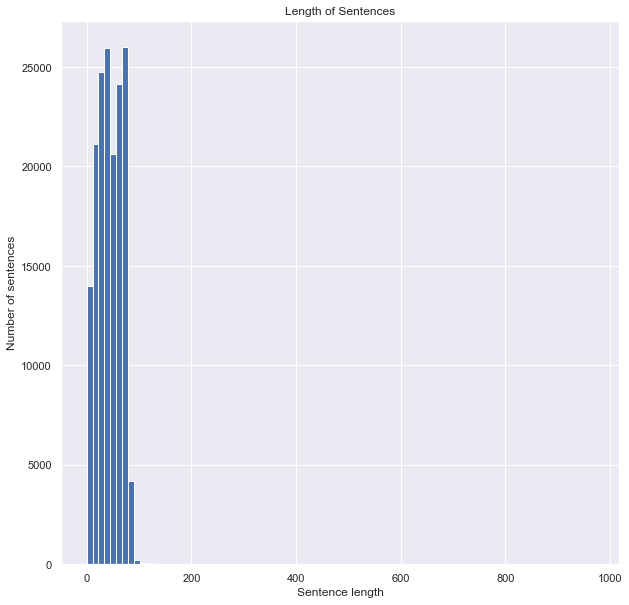

In [121]:
train_df_ii = pd.DataFrame(y)
train_df_ii[3] = processed_train_comments

print(train_df_ii[3].str.split().str.len().mean())
print(train_df_ii[3].str.split().str.len().max())
train_df_ii["strlen"] = train_df_ii[3].str.split().str.len()


fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.title('Length of Sentences')
plt.hist(train_df_ii["strlen"], bins=86)
plt.show()

In [122]:
_a = train_df_ii.loc[train_df_ii["strlen"] >= 1000].strlen.count()
_b = train_df_ii.loc[train_df_ii["strlen"] >= 750].strlen.count()
_c = train_df_ii.loc[train_df_ii["strlen"] >= 250].strlen.count()
_d = train_df_ii.loc[train_df_ii["strlen"] >= 180].strlen.count()
_e = train_df_ii.loc[train_df_ii["strlen"] >= 100].strlen.count()
_f = train_df_ii.loc[train_df_ii["strlen"] < 100].strlen.count()
print (" # of Reviews by Length \n %s >1000 words \n %s >750 words \n %s >250 words \n %s >180 words \n %s >100 words \n %s <100 words\n" % (_a,_b,_c,_d,_e,_f))

 # of Reviews by Length 
 0 >1000 words 
 1 >750 words 
 30 >250 words 
 70 >180 words 
 270 >100 words 
 161027 <100 words



In [123]:
# Drop long rows
train_df_ii = train_df_ii.loc[train_df_ii["strlen"] <= MAX_SEQUENCE_LENGTH]

print("New word count mean:", train_df_ii[3].str.split().str.len().mean())
print("New word count max:",train_df_ii[3].str.split().str.len().max())
train_df_ii.describe()

New word count mean: 43.31676116075587
New word count max: 100


,0,1,2,strlen
count,161033.000000,161033.000000,161033.000000,161033.000000
mean,0.248421,0.089062,0.662516,43.316761
std,0.432099,0.284835,0.472853,22.215196
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,25.000000
50%,0.000000,0.000000,1.000000,43.000000
75%,0.000000,0.000000,1.000000,64.000000
max,1.000000,1.000000,1.000000,100.000000


In [124]:
post_processed_train_comments = train_df_ii[3].tolist()
post_processed_y = train_df_ii[[0, 1, 2]].values

In [125]:
# Tokenize the data
tokenizer = Tokenizer(num_words = MAX_NB_WORDS, 
                      filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',
                      lower=True, split=' ', char_level=False, 
                      oov_token=None, document_count=0)

tokenizer.fit_on_texts(post_processed_train_comments + processed_test_comments)

# Convert to sequences
train_sequences = tokenizer.texts_to_sequences(post_processed_train_comments)
test_sequences = tokenizer.texts_to_sequences(processed_test_comments)
word_index = tokenizer.word_index
print('found %s tokens in text.' %(len(word_index)))

# Ensure all sequences have the same length. 
train_data = pad_sequences(train_sequences, maxlen = MAX_SEQUENCE_LENGTH)
final_test_data = pad_sequences(test_sequences, maxlen = MAX_SEQUENCE_LENGTH)

print(train_data.shape, '<-- shape of train_data')
print(final_test_data.shape, '<-- shape of final_test_data ready for fedding to network.')
print(len(word_index), '<-- Length of Word Index')

found 113282 tokens in text.
(161033, 100) <-- shape of train_data
(53766, 100) <-- shape of final_test_data ready for fedding to network.
113282 <-- Length of Word Index


In [126]:
# Train Validation Split
X_train, X_val, Y_train, Y_val = train_test_split(train_data, post_processed_y,
                                                  test_size = 0.2,  stratify= post_processed_y, 
                                                  random_state = 2020)
X_test = final_test_data
Y_test = y_test_predicted

######################################################
print('train data shape:', X_train.shape)
print('validation data shape:', X_val.shape)

train data shape: (128826, 100)
validation data shape: (32207, 100)


In [127]:
from keras.layers import LSTM, SpatialDropout1D
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

nb_words  = min(MAX_NB_WORDS, len(word_index))
lstm_out = MAX_SEQUENCE_LENGTH

model = Sequential()
model.add(Embedding(nb_words,EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [128]:
#Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 160)          480000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 100, 128)          61568     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 50, 128)           0         
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 50, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 633,471
Trainable params: 633,471
Non-trainable params: 0
________________________________________________

In [129]:
notebookname = "Drug_Reviews_"
variant = "CNN-LSTM_stopwords_"
version = "1.0_"
title = notebookname + variant + version

# Fit on Dataset
training_cycle = 1
batch = 32 
epoch = 40

stamp = '{}trainging_cycle{}batchsize_{}'.format(title,training_cycle,batch)
print(stamp)
best_model_path = title + stamp + 'best.h5'

early_stopping = EarlyStopping(patience = 4)
model_checkpoint = ModelCheckpoint(best_model_path, save_best_only = True)


# Run LSTM Model
CNN_LSTM_model = model.fit(X_train, Y_train, batch_size=batch, epochs=epoch,
                       validation_data=(X_val, Y_val), shuffle = True, 
                       callbacks = [early_stopping, model_checkpoint], verbose = 0)
best_score = min(CNN_LSTM_model.history['val_loss'])


Drug_Reviews_CNN-LSTM_stopwords_1.0_trainging_cycle1batchsize_32


C:\Users\ankit\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [130]:
# Save Training History
df_fit = pd.DataFrame(columns=['loss','acc','val_loss','val_acc'])
df_fit['loss'] = CNN_LSTM_model.history['loss']
df_fit['val_loss'] = CNN_LSTM_model.history['val_loss']
df_fit['acc'] = CNN_LSTM_model.history['accuracy']
df_fit['val_acc'] = CNN_LSTM_model.history['val_accuracy']

save_name = ('DrugDataCNN-LSTM_batch_{}_epoch_{}_cycle_{}'.format(batch,epoch,training_cycle))
model.save('{}_end.h5'.format(save_name))
df_fit.to_csv('{}.csv'.format(save_name))

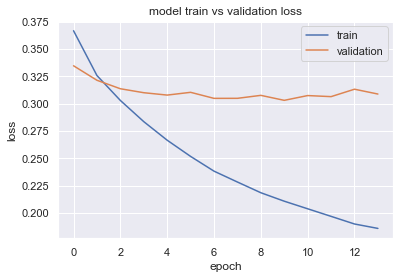

In [131]:
# Plot training vs validation loss over epoch. 

plt.plot(CNN_LSTM_model.history['loss'])
plt.plot(CNN_LSTM_model.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

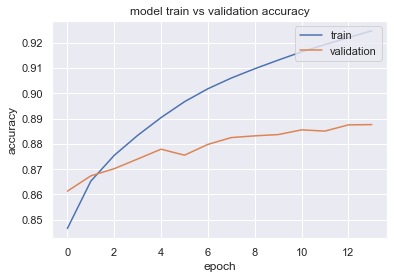

In [132]:
plt.plot(CNN_LSTM_model.history['accuracy'])
plt.plot(CNN_LSTM_model.history['val_accuracy'])
plt.title('model train vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [133]:
accr = model.evaluate(X_test,Y_test, batch_size = 256)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

53766/53766 [==============================] - 34s 626us/step
Test set
  Loss: 0.314
  Accuracy: 0.887


In [134]:
prediction = model.predict(X_test)

In [135]:
target_names = ['Positive','Neutral','Negative']
lstm_cm=confusion_matrix(Y_test.argmax(axis=1), prediction.argmax(axis=1))

In [136]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()

    return plt

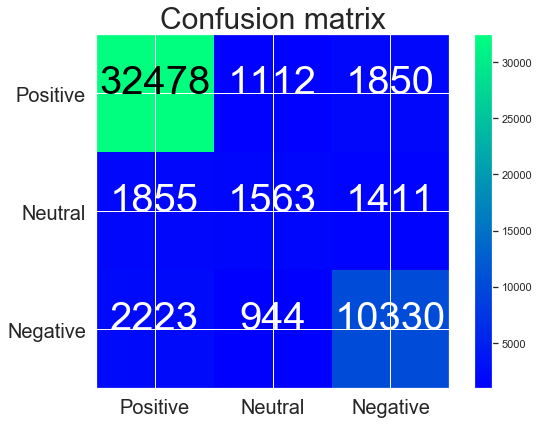

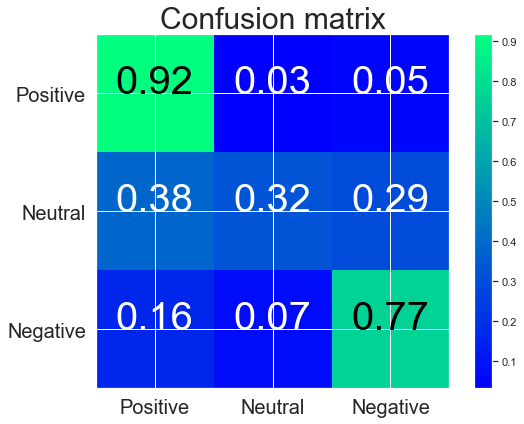

In [137]:
cm = confusion_matrix(Y_test.argmax(axis=1), prediction.argmax(axis=1), labels = [2,1,0])
fig = plt.figure(figsize=(8, 6))
plot = plot_confusion_matrix(cm, classes=['Positive','Neutral','Negative'], normalize=False, title='Confusion matrix')
plt.show()

cm = confusion_matrix(Y_test.argmax(axis=1), prediction.argmax(axis=1), labels = [2,1,0])
fig = plt.figure(figsize=(8, 6))
plot = plot_confusion_matrix(cm, classes=['Positive','Neutral','Negative'], normalize=True, title='Confusion matrix')
plt.show()

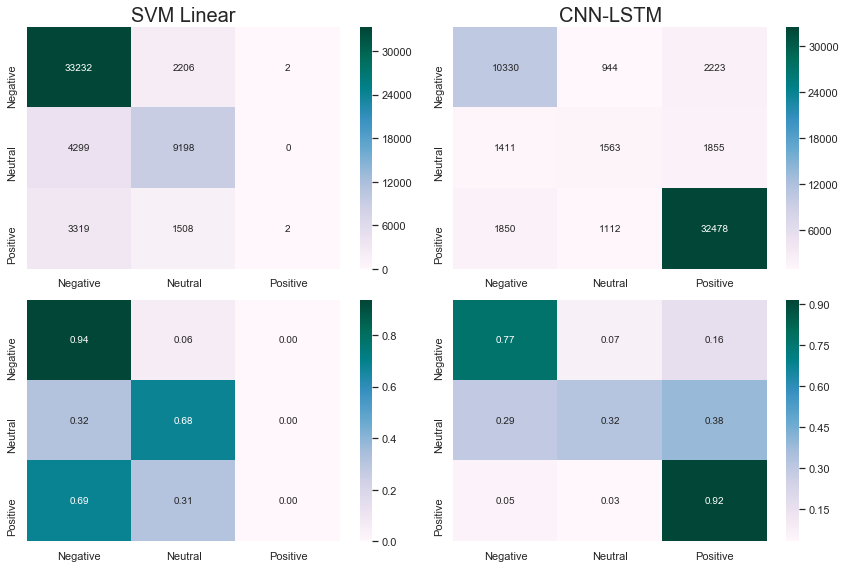

In [138]:
#Confusion Matrix comparing SVM and CNN-LSTM
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_confusion_matrix_subplots(conf_mat,ax1,ax2,cbar=True):
    conf_mat_percentage = conf_mat/(conf_mat.sum(1).reshape(-1,1))

    conf_mat = pd.DataFrame(conf_mat,index=['Negative','Neutral','Positive'],columns=['Negative','Neutral','Positive'])
    conf_mat_percentage = pd.DataFrame(conf_mat_percentage,index=['Negative','Neutral','Positive'],columns=['Negative','Neutral','Positive'])
    
    sns.heatmap(conf_mat, annot=True,fmt="d",cmap="PuBuGn",cbar=cbar,ax=ax1)
    sns.heatmap(conf_mat_percentage, annot=True,fmt=".2f",cmap="PuBuGn",cbar=cbar,ax=ax2)


fig, axes = plt.subplots(2, 2, figsize=(12,8))
plot_confusion_matrix_subplots(svm_lin_conf_matrix,axes[0,0],axes[1,0])
plot_confusion_matrix_subplots(lstm_cm,axes[0,1],axes[1,1])
axes[0,0].set_title("SVM Linear",fontsize=20)
axes[0,1].set_title("CNN-LSTM",fontsize=20)
plt.tight_layout()